In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [36]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', len(model.trainable_weights))
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

print('conv_base를 동결한 후 훈련되는 가중치희 수:', len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 4
conv_base를 동결한 후 훈련되는 가중치희 수: 10


In [37]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range= 0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'binary'
)

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics =['acc'])

hitory = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = 10,
    verbose = 2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/5
 - 64s - loss: 0.4788 - acc: 0.8000 - val_loss: 0.5867 - val_acc: 0.8400
Epoch 2/5
 - 46s - loss: 0.4599 - acc: 0.8000 - val_loss: 0.1309 - val_acc: 0.8900
Epoch 3/5
 - 50s - loss: 0.4486 - acc: 0.7900 - val_loss: 0.2879 - val_acc: 0.8700
Epoch 4/5
 - 56s - loss: 0.4482 - acc: 0.8000 - val_loss: 0.3858 - val_acc: 0.8200
Epoch 5/5
 - 51s - loss: 0.3414 - acc: 0.8400 - val_loss: 0.3184 - val_acc: 0.8500


In [0]:
history = hitory

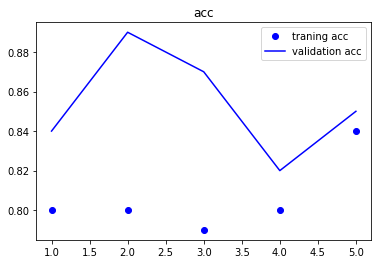

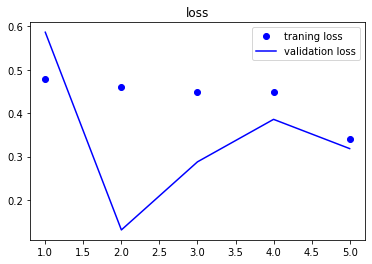

In [39]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print()
epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='traning acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='traning loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('loss')
plt.legend()

plt.show()

In [41]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'binary'
)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.8379999995231628
